In [1]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Using Theano backend.


In [2]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
    ])
# model.add(l4) Can also add layers like this.

## Note, Dense is suggesting each layer, this is a 3 layer network

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [6]:
train_labels = []
train_samples = []

In [7]:
for i in range(50):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [8]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
model.fit(scaled_train_samples, train_labels, batch_size=10, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
 - 0s - loss: 0.6565 - acc: 0.5405
Epoch 2/20
 - 0s - loss: 0.6249 - acc: 0.6100
Epoch 3/20


/Users/davescott/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 - 0s - loss: 0.5827 - acc: 0.6990
Epoch 4/20
 - 0s - loss: 0.5312 - acc: 0.7862
Epoch 5/20
 - 0s - loss: 0.4870 - acc: 0.8129
Epoch 6/20
 - 0s - loss: 0.4455 - acc: 0.8467
Epoch 7/20
 - 0s - loss: 0.4058 - acc: 0.8690
Epoch 8/20
 - 0s - loss: 0.3697 - acc: 0.8900
Epoch 9/20
 - 0s - loss: 0.3374 - acc: 0.9071
Epoch 10/20
 - 0s - loss: 0.3191 - acc: 0.9143
Epoch 11/20
 - 0s - loss: 0.3065 - acc: 0.9233
Epoch 12/20
 - 0s - loss: 0.2973 - acc: 0.9248
Epoch 13/20
 - 0s - loss: 0.2907 - acc: 0.9286
Epoch 14/20
 - 0s - loss: 0.2853 - acc: 0.9286
Epoch 15/20
 - 0s - loss: 0.2809 - acc: 0.9290
Epoch 16/20
 - 0s - loss: 0.2781 - acc: 0.9357
Epoch 17/20
 - 0s - loss: 0.2749 - acc: 0.9324
Epoch 18/20
 - 0s - loss: 0.2728 - acc: 0.9329
Epoch 19/20
 - 0s - loss: 0.2705 - acc: 0.9333
Epoch 20/20
 - 0s - loss: 0.2690 - acc: 0.9381


# 20 Epochs gives an accuracy of over 93% fit for the model. #notbad

In [11]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.2795 - acc: 0.9296 - val_loss: 0.1579 - val_acc: 0.9810
Epoch 2/20
 - 0s - loss: 0.2783 - acc: 0.9360 - val_loss: 0.1556 - val_acc: 0.9762
Epoch 3/20


/Users/davescott/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 - 0s - loss: 0.2773 - acc: 0.9302 - val_loss: 0.1546 - val_acc: 0.9810
Epoch 4/20
 - 0s - loss: 0.2763 - acc: 0.9333 - val_loss: 0.1538 - val_acc: 0.9810
Epoch 5/20
 - 0s - loss: 0.2757 - acc: 0.9328 - val_loss: 0.1513 - val_acc: 0.9810
Epoch 6/20
 - 0s - loss: 0.2748 - acc: 0.9365 - val_loss: 0.1496 - val_acc: 0.9762
Epoch 7/20
 - 0s - loss: 0.2741 - acc: 0.9349 - val_loss: 0.1487 - val_acc: 0.9810
Epoch 8/20
 - 0s - loss: 0.2733 - acc: 0.9339 - val_loss: 0.1473 - val_acc: 0.9762
Epoch 9/20
 - 0s - loss: 0.2725 - acc: 0.9360 - val_loss: 0.1464 - val_acc: 0.9810
Epoch 10/20
 - 0s - loss: 0.2720 - acc: 0.9376 - val_loss: 0.1453 - val_acc: 0.9810
Epoch 11/20
 - 0s - loss: 0.2713 - acc: 0.9354 - val_loss: 0.1444 - val_acc: 0.9810
Epoch 12/20
 - 0s - loss: 0.2708 - acc: 0.9376 - val_loss: 0.1434 - val_acc: 0.9810
Epoch 13/20
 - 0s - loss: 0.2703 - acc: 0.9333 - val_loss: 0.1427 - val_acc: 0.9810
Epoch 14/20
 - 0s - loss: 0.2697 - acc: 0.9376 - val_loss: 0.1417 - val_acc: 0.9810
Epoch 15/2

## Model is generalizing well on the validation data. Not overfitting.

In [12]:
test_labels = []
test_samples = []

In [13]:
for i in range(10):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [14]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [17]:
for i in predictions:
    print(i)

[0.9735085 0.0264915]
[0.10687607 0.8931239 ]
[0.908297   0.09170299]
[0.03740463 0.96259534]
[0.97454816 0.02545181]
[0.10687607 0.8931239 ]
[0.68742335 0.31257668]
[0.26353377 0.7364662 ]
[0.9769765  0.02302349]
[0.03433227 0.9656677 ]
[0.95284873 0.04715124]
[0.05714262 0.9428574 ]
[0.96710396 0.03289602]
[0.04828453 0.95171547]
[0.97187114 0.02812889]
[0.01715956 0.9828404 ]
[0.47008812 0.5299119 ]
[0.02430868 0.9756913 ]
[0.9012102  0.09878978]
[0.01872493 0.9812751 ]
[0.908297   0.09170299]
[0.04074028 0.95925975]
[0.9209082  0.07909177]
[0.03433227 0.9656677 ]
[0.975053   0.02494699]
[0.01319576 0.98680425]
[0.9740334  0.02596659]
[0.12903188 0.8709681 ]
[0.93971306 0.06028695]
[0.3815565 0.6184435]
[0.97242755 0.02757245]
[0.02650865 0.9734914 ]
[0.9729733  0.02702673]
[0.03740463 0.96259534]
[0.95284873 0.04715124]
[0.33972397 0.66027606]
[0.9357315  0.06426853]
[0.03150404 0.96849597]
[0.51544213 0.48455787]
[0.42522302 0.574777  ]
[0.96440625 0.03559376]
[0.07997793 0.920022

In [18]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)

In [19]:
for i in rounded_predictions:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


## We can see these predictions with either a binary or a decimal without roundoff

# Confusion Matrix

In [20]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [21]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[194  16]
 [  9 201]]


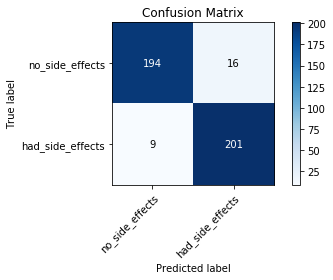

In [36]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title="Confusion Matrix")

# Confusion matrices are a nice way to quickly see how our model is doing on data it hasn't seen before.